In [1]:
import pandas as pd
import sys, os
import geopandas as gpd
# from pandas import Timestamp
# from shapely.geometry import Point

In [2]:
sys.path.append(os.path.join(os.path.expanduser("~"), "Repos", "LEN_STAC", "src"))

In [3]:
from len_tools import Catalog

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%%time
cat = Catalog()

Wall time: 31.4 s


In [6]:
cat.scenes.head()

,idx,col_id,filename,item_id,href,bbox,geometry,date,datetime,ym,minx,miny,maxx,maxy
0,0,VIIRS_DNB_rade9_201204,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0009017_e0014421_b02208_c20120428182646408538_devl_pop.rade9.co.json,SVDNB_npp_d20120401_t0009017_e0014421_b02208_c20120428182646408538_devl_pop.rade9.co,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0009017_e0014421_b02208_c20120428182646408538_devl_pop.rade9.co.tif,"[-5.00208333335, 61.00208322135, 119.99791766665, 75.00208333335]","POLYGON ((-5.002083 61.002083, -5.002083 75.002083, 119.997918 75.002083, 119.997918 61.002083, -5.002083 61.002083))",2012-04-01,2012-04-01 00:09:01+00:00,2012-04,-5.002083,61.002083,119.997918,75.002083
1,1,VIIRS_DNB_rade9_201204,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0014433_e0020237_b02208_c20120428182646409440_devl_pop.rade9.co.json,SVDNB_npp_d20120401_t0014433_e0020237_b02208_c20120428182646409440_devl_pop.rade9.co,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0014433_e0020237_b02208_c20120428182646409440_devl_pop.rade9.co.tif,"[-2.002083335, 46.002061735, 69.99797426500001, 73.002083335]","POLYGON ((-2.002083 46.002062, -2.002083 73.002083, 69.997974 73.002083, 69.997974 46.002062, -2.002083 46.002062))",2012-04-01,2012-04-01 00:14:43+00:00,2012-04,-2.002083,46.002062,69.997974,73.002083
2,2,VIIRS_DNB_rade9_201204,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0020249_e0026035_b02208_c20120428182646410345_devl_pop.rade9.co.json,SVDNB_npp_d20120401_t0020249_e0026035_b02208_c20120428182646410345_devl_pop.rade9.co,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0020249_e0026035_b02208_c20120428182646410345_devl_pop.rade9.co.tif,"[2.997916665, 28.002062535000004, 46.997951865, 54.002083335]","POLYGON ((2.997917 28.002063, 2.997917 54.002083, 46.997952 54.002083, 46.997952 28.002063, 2.997917 28.002063))",2012-04-01,2012-04-01 00:20:24+00:00,2012-04,2.997917,28.002063,46.997952,54.002083
3,3,VIIRS_DNB_rade9_201204,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0026047_e0031451_b02208_c20120428182646411260_devl_pop.rade9.co.json,SVDNB_npp_d20120401_t0026047_e0031451_b02208_c20120428182646411260_devl_pop.rade9.co,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0026047_e0031451_b02208_c20120428182646411260_devl_pop.rade9.co.tif,"[-0.002083335, 9.002063335000003, 35.997945465, 34.002083335]","POLYGON ((-0.002083 9.002063, -0.002083 34.002083, 35.997945 34.002083, 35.997945 9.002063, -0.002083 9.002063))",2012-04-01,2012-04-01 00:26:04+00:00,2012-04,-0.002083,9.002063,35.997945,34.002083
4,4,VIIRS_DNB_rade9_201204,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0031464_e0037268_b02208_c20120428182646412163_devl_pop.rade9.co.json,SVDNB_npp_d20120401_t0031464_e0037268_b02208_c20120428182646412163_devl_pop.rade9.co,https://globalnightlight.s3.amazonaws.com/201204/SVDNB_npp_d20120401_t0031464_e0037268_b02208_c20120428182646412163_devl_pop.rade9.co.tif,"[-4.002083335, -9.997935865, 28.997943064999994, 14.002083335]","POLYGON ((-4.002083 -9.997935999999999, -4.002083 14.002083, 28.997943 14.002083, 28.997943 -9.997935999999999, -4.002083 -9.997935999999999))",2012-04-01,2012-04-01 00:31:46+00:00,2012-04,-4.002083,-9.997936,28.997943,14.002083


In [7]:
len(cat)

396262

In [8]:
print(cat)

Catalog with 396262 scenes


In [9]:
cat.scenes.ym.unique()

array(['2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', 

In [10]:
cat_time_filter = cat.search_by_year_month(2020, 5)
# res = cat.search_by_day("2020-05-04")

In [11]:
print(cat_time_filter)

Catalog with 3666 scenes


In [12]:
adm0 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [13]:
adm0 = adm0.loc[adm0.iso_a3 == "NIC"]

<AxesSubplot:>

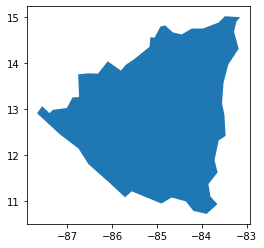

In [14]:
adm0.plot()

In [15]:
point = adm0.centroid.iloc[0]

C:\Users\gostm\AppData\Local\Temp/ipykernel_2896/3455296129.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = adm0.centroid.iloc[0]


In [16]:
%%time
# cat_aoi_filter = cat_time_filter.search_by_intersect(point)
cat_aoi_filter = cat_time_filter.search_by_intersect(adm0)

Wall time: 38 ms


In [17]:
print(cat_aoi_filter)

Catalog with 70 scenes


In [18]:
cat_aoi_filter.scenes.head()

,idx,col_id,filename,item_id,href,bbox,geometry,date,datetime,ym,minx,miny,maxx,maxy
365984,29,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0624008_e0629412_b44093_c20200501102942807493_noac_ops.rade9.co.json,SVDNB_npp_d20200501_t0624008_e0629412_b44093_c20200501102942807493_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0624008_e0629412_b44093_c20200501102942807493_noac_ops.rade9.co.tif,"[-90.002083335, 1.002063334999999, -56.002056135, 26.002083335]","POLYGON ((-90.00208 1.00206, -90.00208 26.00208, -56.00206 26.00208, -56.00206 1.00206, -90.00208 1.00206))",2020-05-01,2020-05-01 06:24:00+00:00,2020-05,-90.002083,1.002063,-56.002056,26.002083
365993,38,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0806264_e0812068_b44094_c20200501121207969852_noac_ops.rade9.co.json,SVDNB_npp_d20200501_t0806264_e0812068_b44094_c20200501121207969852_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0806264_e0812068_b44094_c20200501121207969852_noac_ops.rade9.co.tif,"[-116.002083335, -1.997936665000001, -82.002056135, 23.002083335]","POLYGON ((-116.00208 -1.99794, -116.00208 23.00208, -82.00206 23.00208, -82.00206 -1.99794, -116.00208 -1.99794))",2020-05-01,2020-05-01 08:06:26+00:00,2020-05,-116.002083,-1.997937,-82.002056,23.002083
366104,149,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0606305_e0612109_b44107_c20200502101212281822_noac_ops.rade9.co.json,SVDNB_npp_d20200502_t0606305_e0612109_b44107_c20200502101212281822_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0606305_e0612109_b44107_c20200502101212281822_noac_ops.rade9.co.tif,"[-86.002083335, -3.997936665000001, -53.002056935, 21.002083335]","POLYGON ((-86.00208 -3.99794, -86.00208 21.00208, -53.00206 21.00208, -53.00206 -3.99794, -86.00208 -3.99794))",2020-05-02,2020-05-02 06:06:30+00:00,2020-05,-86.002083,-3.997937,-53.002057,21.002083
366112,157,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0743145_e0748549_b44108_c20200502114856562241_noac_ops.rade9.co.json,SVDNB_npp_d20200502_t0743145_e0748549_b44108_c20200502114856562241_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0743145_e0748549_b44108_c20200502114856562241_noac_ops.rade9.co.tif,"[-108.002083335, 12.002063335000003, -72.00205453499998, 37.002083335]","POLYGON ((-108.00208 12.00206, -108.00208 37.00208, -72.00205 37.00208, -72.00205 12.00206, -108.00208 12.00206))",2020-05-02,2020-05-02 07:43:14+00:00,2020-05,-108.002083,12.002063,-72.002055,37.002083
366113,158,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0748561_e0754365_b44108_c20200502115437436693_noac_ops.rade9.co.json,SVDNB_npp_d20200502_t0748561_e0754365_b44108_c20200502115437436693_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0748561_e0754365_b44108_c20200502115437436693_noac_ops.rade9.co.tif,"[-112.002083335, -6.997936665000001, -79.002056935, 18.002083335]","POLYGON ((-112.00208 -6.99794, -112.00208 18.00208, -79.00206 18.00208, -79.00206 -6.99794, -112.00208 -6.99794))",2020-05-02,2020-05-02 07:48:56+00:00,2020-05,-112.002083,-6.997937,-79.002057,18.002083
